In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_normal = pd.read_csv("ptbdb_normal.csv", header=None)
df_normal.rename(columns={187: 'Label'}, inplace=True)
df_abnormal = pd.read_csv("ptbdb_abnormal.csv", header=None)
df_abnormal.rename(columns={187: 'Label'}, inplace=True)
df_combined = pd.concat([df_normal, df_abnormal], ignore_index=True)

In [3]:
X = df_combined.iloc[:, :-1]
y = df_combined['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

Text(0.5, 23.52222222222222, 'Predicted Label')

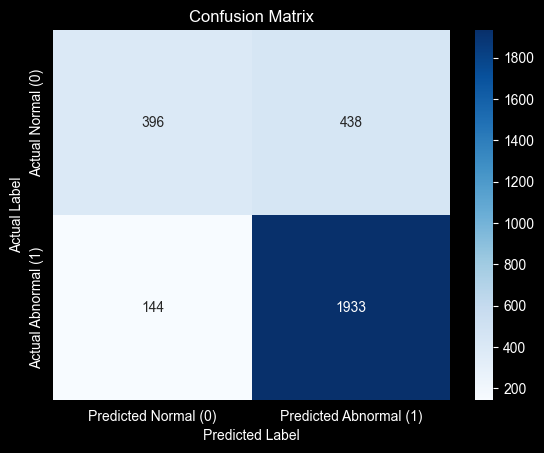

In [6]:
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal (0)', 'Predicted Abnormal (1)'],
            yticklabels=['Actual Normal (0)', 'Actual Abnormal (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')